In [130]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt  
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

In [131]:
df = pd.read_csv('train-chennai-sale.csv')
df = df.iloc[:,1:]
df

AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004  04-05-2011            131        1.0         1.0   
1     Anna Nagar      1986  19-12-2006             26        2.0         1.0   
2          Adyar       909  04-02-2012             70        1.0         1.0   
3      Velachery      1855  13-03-2010             14        3.0         2.0   
4     Karapakkam      1226  05-10-2009             84        1.0         1.0   
...          ...       ...         ...            ...        ...         ...   
7104  Karapakkam       598  03-01-2011             51        1.0         1.0   
7105   Velachery      1897  08-04-2004             52        3.0         2.0   
7106   Velachery      1614  25-08-2006            152        2.0         1.0   
7107  Karapakkam       787  03-08-2009             40        1.0         1.0   
7108   Velachery      1896  13-07-2005            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD  ... UTILITY_AVAIL  \
0          3     AbNormal        Yes  15-05-1967  ...        AllPub   
1          5     AbNormal         No  22-12-1995  ...        AllPub   
2          3     AbNormal        Yes  09-02-1992  ...           ELO   
3          5       Family         No  18-03-1988  ...       NoSewr    
4          3     AbNormal        Yes  13-10-1979  ...        AllPub   
...      ...          ...        ...         ...  ...           ...   
7104       2      AdjLand         No  15-01-1962  ...           ELO   
7105       5       Family        Yes  11-04-1995  ...        NoSeWa   
7106       4  Normal Sale         No  01-09-1978  ...        NoSeWa   
7107       2      Partial        Yes  11-08-1977  ...           ELO   
7108       5      Partial        Yes  24-07-1961  ...           ELO   

         STREET MZZONE QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0          3.9         4.9       4.330   380000   
1        Gravel     RH      4.9          4.2         2.5       3.765   760122   
2        Gravel     RL      4.1          3.8         2.2       3.090   421094   
3         Paved      I      4.7          3.9         3.6       4.010   356321   
4        Gravel      C      3.0          2.5         4.1       3.290   237000   
...         ...    ...      ...          ...         ...         ...      ...   
7104  No Access     RM      3.0          2.2         2.4       2.520   208767   
7105  No Access     RH      3.6          4.5         3.3       3.920   346191   
7106     Gravel      I      4.3          4.2         2.9       3.840   317354   
7107      Paved     RL      4.6          3.8         4.1       4.160   425350   
7108      Paved      I      3.1          3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 21 columns]

In [132]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

# Data Cleaning,Preprocessing and Exploration

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  REG_FEE 

So first we need to identify the data range especially oldest and the new so we need first convert 'DATE_SALE' column to datatime dtype and need to extract the year alone to a new column called Year.

In [134]:
df['DATE_SALE'] = df['DATE_SALE'].astype('datetime64[ns]')
df['DATE_BUILD'] = df['DATE_BUILD'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [135]:
df['DATE_BUILD'].describe()

C:\Users\Alan\AppData\Local\Temp/ipykernel_9424/3976200058.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    7109
unique                   5808
top       1987-02-07 00:00:00
freq                        6
first     1949-10-28 00:00:00
last      2010-12-11 00:00:00
Name: DATE_BUILD, dtype: object

In [136]:
df['Year_Built'] =  pd.DatetimeIndex(df['DATE_BUILD']).year
df['Month_Sales'] = pd.DatetimeIndex(df['DATE_SALE']).month
df['Year_Sales'] = pd.DatetimeIndex(df['DATE_SALE']).year

In [137]:
df

AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0     Karapakkam      1004 2011-04-05            131        1.0         1.0   
1     Anna Nagar      1986 2006-12-19             26        2.0         1.0   
2          Adyar       909 2012-04-02             70        1.0         1.0   
3      Velachery      1855 2010-03-13             14        3.0         2.0   
4     Karapakkam      1226 2009-05-10             84        1.0         1.0   
...          ...       ...        ...            ...        ...         ...   
7104  Karapakkam       598 2011-03-01             51        1.0         1.0   
7105   Velachery      1897 2004-08-04             52        3.0         2.0   
7106   Velachery      1614 2006-08-25            152        2.0         1.0   
7107  Karapakkam       787 2009-03-08             40        1.0         1.0   
7108   Velachery      1896 2005-07-13            156        3.0         2.0   

      N_ROOM    SALE_COND PARK_FACIL DATE_BUILD  ... QS_ROOMS QS_BATHROOM  \
0          3     AbNormal        Yes 1967-05-15  ...      4.0         3.9   
1          5     AbNormal         No 1995-12-22  ...      4.9         4.2   
2          3     AbNormal        Yes 1992-09-02  ...      4.1         3.8   
3          5       Family         No 1988-03-18  ...      4.7         3.9   
4          3     AbNormal        Yes 1979-10-13  ...      3.0         2.5   
...      ...          ...        ...        ...  ...      ...         ...   
7104       2      AdjLand         No 1962-01-15  ...      3.0         2.2   
7105       5       Family        Yes 1995-11-04  ...      3.6         4.5   
7106       4  Normal Sale         No 1978-01-09  ...      4.3         4.2   
7107       2      Partial        Yes 1977-11-08  ...      4.6         3.8   
7108       5      Partial        Yes 1961-07-24  ...      3.1         3.5   

     QS_BEDROOM QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  Year_Built  \
0           4.9      4.330   380000  144400      7600000        1967   
1           2.5      3.765   760122  304049     21717770        1995   
2           2.2      3.090   421094   92114     13159200        1992   
3           3.6      4.010   356321   77042      9630290        1988   
4           4.1      3.290   237000   74063      7406250        1979   
...         ...        ...      ...     ...          ...         ...   
7104        2.4      2.520   208767  107060      5353000        1962   
7105        3.3      3.920   346191  205551     10818480        1995   
7106        2.9      3.840   317354  167028      8351410        1978   
7107        4.1      4.160   425350  119098      8507000        1977   
7108        4.3      3.640   349177   79812      9976480        1961   

      Month_Sales  Year_Sales  
0               4        2011  
1              12        2006  
2               4        2012  
3               3        2010  
4               5        2009  
...           ...         ...  
7104            3        2011  
7105            8        2004  
7106            8        2006  
7107            3        2009  
7108            7        2005  

[7109 rows x 24 columns]

Shifting the Year column to the right of DATE_SALE

In [138]:
col = df.pop('Year_Built')
df.insert(3, 'Year_Built',col)
col_1 = df.pop('Month_Sales')
df.insert(4, 'Month_Sales',col_1)
col_2 = df.pop('Year_Sales')
df.insert(5, 'Year_Sales',col_2)

In [139]:
df

AREA  INT_SQFT  DATE_SALE  Year_Built  Month_Sales  Year_Sales  \
0     Karapakkam      1004 2011-04-05        1967            4        2011   
1     Anna Nagar      1986 2006-12-19        1995           12        2006   
2          Adyar       909 2012-04-02        1992            4        2012   
3      Velachery      1855 2010-03-13        1988            3        2010   
4     Karapakkam      1226 2009-05-10        1979            5        2009   
...          ...       ...        ...         ...          ...         ...   
7104  Karapakkam       598 2011-03-01        1962            3        2011   
7105   Velachery      1897 2004-08-04        1995            8        2004   
7106   Velachery      1614 2006-08-25        1978            8        2006   
7107  Karapakkam       787 2009-03-08        1977            3        2009   
7108   Velachery      1896 2005-07-13        1961            7        2005   

      DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  ... UTILITY_AVAIL  \
0               131        1.0         1.0       3  ...        AllPub   
1                26        2.0         1.0       5  ...        AllPub   
2                70        1.0         1.0       3  ...           ELO   
3                14        3.0         2.0       5  ...       NoSewr    
4                84        1.0         1.0       3  ...        AllPub   
...             ...        ...         ...     ...  ...           ...   
7104             51        1.0         1.0       2  ...           ELO   
7105             52        3.0         2.0       5  ...        NoSeWa   
7106            152        2.0         1.0       4  ...        NoSeWa   
7107             40        1.0         1.0       2  ...           ELO   
7108            156        3.0         2.0       5  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM QS_BEDROOM QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9        4.9      4.330   380000   
1        Gravel     RH      4.9         4.2        2.5      3.765   760122   
2        Gravel     RL      4.1         3.8        2.2      3.090   421094   
3         Paved      I      4.7         3.9        3.6      4.010   356321   
4        Gravel      C      3.0         2.5        4.1      3.290   237000   
...         ...    ...      ...         ...        ...        ...      ...   
7104  No Access     RM      3.0         2.2        2.4      2.520   208767   
7105  No Access     RH      3.6         4.5        3.3      3.920   346191   
7106     Gravel      I      4.3         4.2        2.9      3.840   317354   
7107      Paved     RL      4.6         3.8        4.1      4.160   425350   
7108      Paved      I      3.1         3.5        4.3      3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 24 columns]

In [140]:
df['Year_Built'].describe()

count    7109.000000
mean     1985.491912
std        12.648859
min      1949.000000
25%      1976.000000
50%      1986.000000
75%      1996.000000
max      2010.000000
Name: Year_Built, dtype: float64

As u can see the year range is from 2004 - 2015. So here will take records from 2010 - 2015, since they are the lastest one.

In [141]:
df_new = df[df['Year_Built']>1984]
df_new

AREA  INT_SQFT  DATE_SALE  Year_Built  Month_Sales  Year_Sales  \
1     Anna Nagar      1986 2006-12-19        1995           12        2006   
2          Adyar       909 2012-04-02        1992            4        2012   
3      Velachery      1855 2010-03-13        1988            3        2010   
5       Chrompet      1220 2014-11-09        2009           11        2014   
7      Velachery      1847 2006-03-13        1996            3        2006   
...          ...       ...        ...         ...          ...         ...   
7098  Anna Nagar      1611 2013-11-21        2008           11        2013   
7100     T Nagar      1733 2010-02-24        1985            2        2010   
7102  Karapakkam       701 2010-03-02        1990            3        2010   
7103  Karapakkam      1462 2010-04-23        1986            4        2010   
7105   Velachery      1897 2004-08-04        1995            8        2004   

      DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  ... UTILITY_AVAIL  \
1                26        2.0         1.0       5  ...        AllPub   
2                70        1.0         1.0       3  ...           ELO   
3                14        3.0         2.0       5  ...       NoSewr    
5                36        2.0         1.0       4  ...        NoSeWa   
7               176        3.0         2.0       5  ...        AllPub   
...             ...        ...         ...     ...  ...           ...   
7098            144        1.0         1.0       4  ...        NoSeWa   
7100            191        1.0         1.0       4  ...        NoSeWa   
7102            100        1.0         1.0       2  ...        NoSeWa   
7103             68        2.0         2.0       4  ...        NoSeWa   
7105             52        3.0         2.0       5  ...        NoSeWa   

         STREET MZZONE QS_ROOMS QS_BATHROOM QS_BEDROOM QS_OVERALL  REG_FEE  \
1        Gravel     RH      4.9         4.2        2.5      3.765   760122   
2        Gravel     RL      4.1         3.8        2.2      3.090   421094   
3         Paved      I      4.7         3.9        3.6      4.010   356321   
5     No Access     RH      4.5         2.6        3.1      3.320   409027   
7        Gravel     RM      2.4         4.5        2.1      3.260   604809   
...         ...    ...      ...         ...        ...        ...      ...   
7098      Paved     RM      3.2         3.7        2.9      3.205   432288   
7100  No Access     RL      3.4         3.7        2.1      2.890   702058   
7102     Gravel     RH      4.2         3.0        2.0      2.960   282175   
7103     Gravel     RM      2.7         3.3        3.6      3.240   356716   
7105  No Access     RH      3.6         4.5        3.3      3.920   346191   

      COMMIS  SALES_PRICE  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
5     198316     12394750  
7     235204     16800250  
...      ...          ...  
7098  209172     13944780  
7100  312026     19501600  
7102  141088      5643500  
7103  178358      9387250  
7105  205551     10818480  

[3899 rows x 24 columns]

Here we use Square feet which is also the best independent variable for so to identify the outlier 

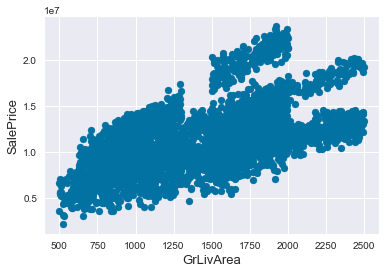

In [142]:
fig, ax = plt.subplots()
ax.scatter(x = df_new['INT_SQFT'], y = df_new['SALES_PRICE'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

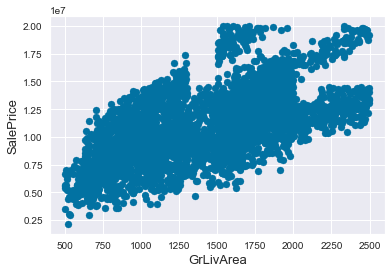

In [143]:
#Deleting outliers
df_new = df_new.drop(df_new[(df_new['INT_SQFT']>1500) & (df_new['SALES_PRICE']>20000000)].index)

fig, ax = plt.subplots()
ax.scatter(df_new['INT_SQFT'], df_new['SALES_PRICE'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [144]:
from scipy import stats
from scipy.stats import norm, skew

C:\Users\Alan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).




 mu = 10884971.83 and sigma = 3220967.12



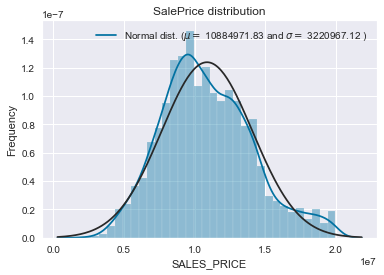

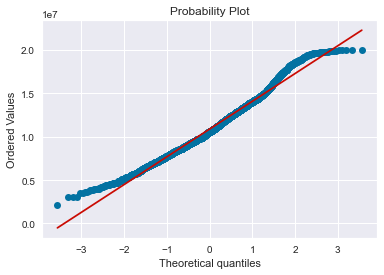

In [145]:
sns.distplot(df_new['SALES_PRICE'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_new['SALES_PRICE'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_new['SALES_PRICE'], plot=plt)
plt.show()

In [146]:
df_new['SALES_PRICE'].isnull().sum()

0

The skew seems now corrected and the data appears more normally distributed.

In [147]:
all_data_na = df_new.drop(['SALES_PRICE'], axis=1)
all_data_na = (all_data_na.isnull().sum() / len(all_data_na)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

Missing Ratio
QS_OVERALL       0.771072
N_BEDROOM        0.026589
N_BATHROOM       0.026589

Text(0.5, 1.0, 'Percent missing data by feature')

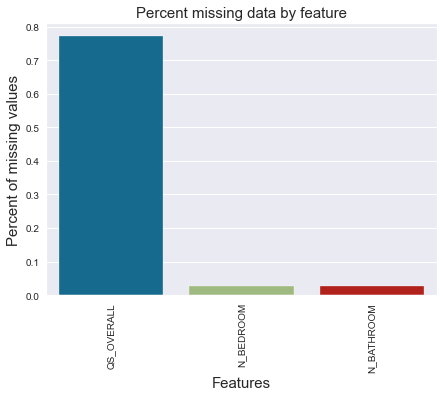

In [148]:
f, ax = plt.subplots(figsize=(7, 5))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<AxesSubplot:>

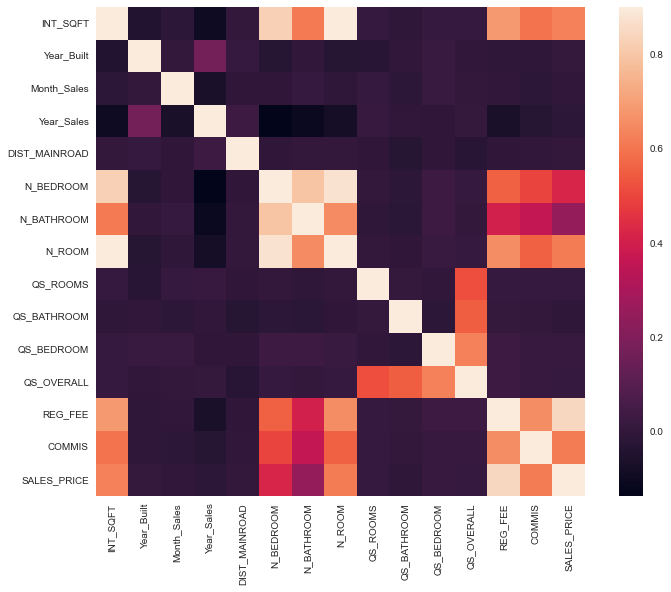

In [149]:
corrmat = df_new.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

There are situations when the variable has a lot of missing values, in this case, if the variable is not a very important predictor for the target variable, the variable can be dropped completely. As a rule of thumb, when the data goes missing on 60–70 percent of the variable, dropping the variable should be considered. And also as u can see the correlation graph the correlation between QS_OVERALL and the target variable is very low (close to 0). So here we drop the column QS_OVERALL.

In [150]:
df_new = df_new.drop(['QS_OVERALL'], axis=1)

In [151]:
df_new

AREA  INT_SQFT  DATE_SALE  Year_Built  Month_Sales  Year_Sales  \
2          Adyar       909 2012-04-02        1992            4        2012   
3      Velachery      1855 2010-03-13        1988            3        2010   
5       Chrompet      1220 2014-11-09        2009           11        2014   
7      Velachery      1847 2006-03-13        1996            3        2006   
9      Velachery      1635 2006-06-22        1991            6        2006   
...          ...       ...        ...         ...          ...         ...   
7098  Anna Nagar      1611 2013-11-21        2008           11        2013   
7100     T Nagar      1733 2010-02-24        1985            2        2010   
7102  Karapakkam       701 2010-03-02        1990            3        2010   
7103  Karapakkam      1462 2010-04-23        1986            4        2010   
7105   Velachery      1897 2004-08-04        1995            8        2004   

      DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  ...   BUILDTYPE  \
2                70        1.0         1.0       3  ...  Commercial   
3                14        3.0         2.0       5  ...      Others   
5                36        2.0         1.0       4  ...  Commercial   
7               176        3.0         2.0       5  ...  Commercial   
9                74        2.0         1.0       4  ...      Others   
...             ...        ...         ...     ...  ...         ...   
7098            144        1.0         1.0       4  ...      Others   
7100            191        1.0         1.0       4  ...  Commercial   
7102            100        1.0         1.0       2  ...       House   
7103             68        2.0         2.0       4  ...      Others   
7105             52        3.0         2.0       5  ...      Others   

     UTILITY_AVAIL     STREET MZZONE QS_ROOMS QS_BATHROOM QS_BEDROOM  REG_FEE  \
2              ELO     Gravel     RL      4.1         3.8        2.2   421094   
3          NoSewr       Paved      I      4.7         3.9        3.6   356321   
5           NoSeWa  No Access     RH      4.5         2.6        3.1   409027   
7           AllPub     Gravel     RM      2.4         4.5        2.1   604809   
9              ELO  No Access      I      3.1         3.1        3.3   323346   
...            ...        ...    ...      ...         ...        ...      ...   
7098        NoSeWa      Paved     RM      3.2         3.7        2.9   432288   
7100        NoSeWa  No Access     RL      3.4         3.7        2.1   702058   
7102        NoSeWa     Gravel     RH      4.2         3.0        2.0   282175   
7103        NoSeWa     Gravel     RM      2.7         3.3        3.6   356716   
7105        NoSeWa  No Access     RH      3.6         4.5        3.3   346191   

      COMMIS  SALES_PRICE  
2      92114     13159200  
3      77042      9630290  
5     198316     12394750  
7     235204     16800250  
9     121255      8083650  
...      ...          ...  
7098  209172     13944780  
7100  312026     19501600  
7102  141088      5643500  
7103  178358      9387250  
7105  205551     10818480  

[3761 rows x 23 columns]

Imputing missing values

In [152]:
df_new['N_BATHROOM'] = df_new['N_BATHROOM'].fillna(round(df_new['N_BATHROOM'].mean()))

In [153]:
df_new['N_BEDROOM'] = df_new['N_BEDROOM'].fillna(round(df_new['N_BEDROOM'].mean()))

In [154]:
df_new.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
Year_Built       0
Month_Sales      0
Year_Sales       0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [155]:
df_new.select_dtypes(include='O').keys()

Index(['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE'],
      dtype='object')

In [156]:
df_new.AREA.unique()

array(['Adyar', 'Velachery', 'Chrompet', 'Karapakkam', 'KK Nagar',
       'TNagar', 'Anna Nagar', 'T Nagar', 'Chrompt', 'Chrmpet',
       'Karapakam', 'Chormpet', 'Velchery', 'Ann Nagar', 'KKNagar'],
      dtype=object)

Here as u can see there are some repitions of places with different spellings, So now that has to be changed to get unique places

In [157]:
df_new["AREA"].replace({"Karapakam": "Karapakkam", "Chormpet": "Chrompet","Chrompt": "Chrompet",
                     "TNagar": "T Nagar","Velchery":"Velachery","Ann Nagar":"Anna Nagar",
                     "Chrmpet":"Chrompet","KK Nagar":"KKNagar"}, inplace=True)

In [158]:
df_new.AREA.unique()

array(['Adyar', 'Velachery', 'Chrompet', 'Karapakkam', 'KKNagar',
       'T Nagar', 'Anna Nagar'], dtype=object)

In [159]:
df_new.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'Normal Sale', 'AdjLand',
       'Ab Normal', 'Adj Land', 'Partiall', 'PartiaLl'], dtype=object)

In [160]:
df_new["SALE_COND"].replace({"Ab Normal": "AbNormal", "Adj Land": "AdjLand","Partiall": "Partial",
                             "PartiaLl": "Partial"}, inplace=True)

In [161]:
df_new.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'Normal Sale', 'AdjLand'],
      dtype=object)

In [162]:
df_new.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [163]:
df_new["PARK_FACIL"].replace({"Yes": 1, "No": 0,"Noo": 0}, inplace=True)

In [164]:
df_new.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House', 'Other', 'Comercial'],
      dtype=object)

In [165]:
df_new["BUILDTYPE"].replace({"Comercial": "Commercial", "Other": "Others"}, inplace=True)

In [166]:
df_new.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [167]:
df_new.UTILITY_AVAIL.unique()

array(['ELO', 'NoSewr ', 'NoSeWa', 'AllPub'], dtype=object)

In [168]:
df_new["UTILITY_AVAIL"].replace({"NoSewr ": "NoSeWa"}, inplace=True)

In [169]:
df_new.UTILITY_AVAIL.unique()

array(['ELO', 'NoSeWa', 'AllPub'], dtype=object)

In [170]:
df_new.STREET.unique()

array(['Gravel', 'Paved', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [171]:
df_new["STREET"].replace({"Pavd": "Paved","NoAccess": "No Access"}, inplace=True)

In [172]:
df_new.STREET.unique()

array(['Gravel', 'Paved', 'No Access'], dtype=object)

In [173]:
df_new.MZZONE.unique()

array(['RL', 'I', 'RH', 'RM', 'C', 'A'], dtype=object)

In [174]:
fig = px.scatter(df_new, x="REG_FEE", y="SALES_PRICE", facet_col="AREA",
                 width=1800, height=400,title='Sales Price vs Registration Fee for different Areas')

fig.update_layout(
    margin=dict(l=50, r=50, t=60, b=30),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [177]:
fig = px.scatter(df_new, x="COMMIS", y="SALES_PRICE", facet_col="AREA",
                 width=1800, height=400,title='Sales Price vs Commission Fee for different Areas')

fig.update_layout(
    margin=dict(l=50, r=50, t=60, b=30),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

1. The Registration Fees is more expensive at KKNagar and cheapest at Adayar and Chrompet, 

2. The Commission Fees is more expensive at KKNagar and cheapest at Adayar and Chrompet.

So buying a house at Chrompet and Adayar can be cheaper and KKNagar would be more expensive

One hot encoding on all categorical variables

In [178]:
df_new = df_new.drop('DATE_BUILD',1)
cat = df_new.select_dtypes(include='O').keys()
cat

C:\Users\Alan\AppData\Local\Temp/ipykernel_9424/3609803975.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Index(['AREA', 'SALE_COND', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'], dtype='object')

In [179]:
cat_data = df_new[cat]
cat_data

AREA SALE_COND   BUILDTYPE UTILITY_AVAIL     STREET MZZONE
2          Adyar  AbNormal  Commercial           ELO     Gravel     RL
3      Velachery    Family      Others        NoSeWa      Paved      I
5       Chrompet   Partial  Commercial        NoSeWa  No Access     RH
7      Velachery    Family  Commercial        AllPub     Gravel     RM
9      Velachery  AbNormal      Others           ELO  No Access      I
...          ...       ...         ...           ...        ...    ...
7098  Anna Nagar   Partial      Others        NoSeWa      Paved     RM
7100     T Nagar  AbNormal  Commercial        NoSeWa  No Access     RL
7102  Karapakkam  AbNormal       House        NoSeWa     Gravel     RH
7103  Karapakkam    Family      Others        NoSeWa     Gravel     RM
7105   Velachery    Family      Others        NoSeWa  No Access     RH

[3761 rows x 6 columns]

In [180]:
for x in cat_data.columns:
    print(x ,':', len(cat_data[x].unique()))

AREA : 7
SALE_COND : 5
BUILDTYPE : 3
UTILITY_AVAIL : 3
STREET : 3
MZZONE : 6


In [181]:
for column in cat_data.columns:
    tempdf = pd.get_dummies(df_new[column], prefix=column)
    df_new = pd.merge(
        left=df_new,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_upd = df_new.drop(columns=column)

In [182]:
df_upd

AREA  INT_SQFT  DATE_SALE  Year_Built  Month_Sales  Year_Sales  \
2          Adyar       909 2012-04-02        1992            4        2012   
3      Velachery      1855 2010-03-13        1988            3        2010   
5       Chrompet      1220 2014-11-09        2009           11        2014   
7      Velachery      1847 2006-03-13        1996            3        2006   
9      Velachery      1635 2006-06-22        1991            6        2006   
...          ...       ...        ...         ...          ...         ...   
7098  Anna Nagar      1611 2013-11-21        2008           11        2013   
7100     T Nagar      1733 2010-02-24        1985            2        2010   
7102  Karapakkam       701 2010-03-02        1990            3        2010   
7103  Karapakkam      1462 2010-04-23        1986            4        2010   
7105   Velachery      1897 2004-08-04        1995            8        2004   

      DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  ... UTILITY_AVAIL_NoSeWa  \
2                70        1.0         1.0       3  ...                    0   
3                14        3.0         2.0       5  ...                    1   
5                36        2.0         1.0       4  ...                    1   
7               176        3.0         2.0       5  ...                    0   
9                74        2.0         1.0       4  ...                    0   
...             ...        ...         ...     ...  ...                  ...   
7098            144        1.0         1.0       4  ...                    1   
7100            191        1.0         1.0       4  ...                    1   
7102            100        1.0         1.0       2  ...                    1   
7103             68        2.0         2.0       4  ...                    1   
7105             52        3.0         2.0       5  ...                    1   

      STREET_Gravel STREET_No Access STREET_Paved MZZONE_A  MZZONE_C  \
2                 1                0            0        0         0   
3                 0                0            1        0         0   
5                 0                1            0        0         0   
7                 1                0            0        0         0   
9                 0                1            0        0         0   
...             ...              ...          ...      ...       ...   
7098              0                0            1        0         0   
7100              0                1            0        0         0   
7102              1                0            0        0         0   
7103              1                0            0        0         0   
7105              0                1            0        0         0   

      MZZONE_I  MZZONE_RH  MZZONE_RL  MZZONE_RM  
2            0          0          1          0  
3            1          0          0          0  
5            0          1          0          0  
7            0          0          0          1  
9            1          0          0          0  
...        ...        ...        ...        ...  
7098         0          0          0          1  
7100         0          0          1          0  
7102         0          1          0          0  
7103         0          0          0          1  
7105         0          1          0          0  

[3761 rows x 48 columns]

In [183]:
df_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 2 to 7105
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AREA                   3761 non-null   object        
 1   INT_SQFT               3761 non-null   int64         
 2   DATE_SALE              3761 non-null   datetime64[ns]
 3   Year_Built             3761 non-null   int64         
 4   Month_Sales            3761 non-null   int64         
 5   Year_Sales             3761 non-null   int64         
 6   DIST_MAINROAD          3761 non-null   int64         
 7   N_BEDROOM              3761 non-null   float64       
 8   N_BATHROOM             3761 non-null   float64       
 9   N_ROOM                 3761 non-null   int64         
 10  SALE_COND              3761 non-null   object        
 11  PARK_FACIL             3761 non-null   int64         
 12  BUILDTYPE              3761 non-null   object        
 13  UTI

In [184]:
for col in df_upd.columns:
    if df_upd[col].dtypes == 'uint8':
        df_upd[col] = df_upd[col].astype(int)

In [185]:
df_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3761 entries, 2 to 7105
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AREA                   3761 non-null   object        
 1   INT_SQFT               3761 non-null   int64         
 2   DATE_SALE              3761 non-null   datetime64[ns]
 3   Year_Built             3761 non-null   int64         
 4   Month_Sales            3761 non-null   int64         
 5   Year_Sales             3761 non-null   int64         
 6   DIST_MAINROAD          3761 non-null   int64         
 7   N_BEDROOM              3761 non-null   float64       
 8   N_BATHROOM             3761 non-null   float64       
 9   N_ROOM                 3761 non-null   int64         
 10  SALE_COND              3761 non-null   object        
 11  PARK_FACIL             3761 non-null   int64         
 12  BUILDTYPE              3761 non-null   object        
 13  UTI

In [186]:
col = df_upd.pop('SALES_PRICE')
df_upd.insert(47, 'SALES_PRICE',col)

<AxesSubplot:>

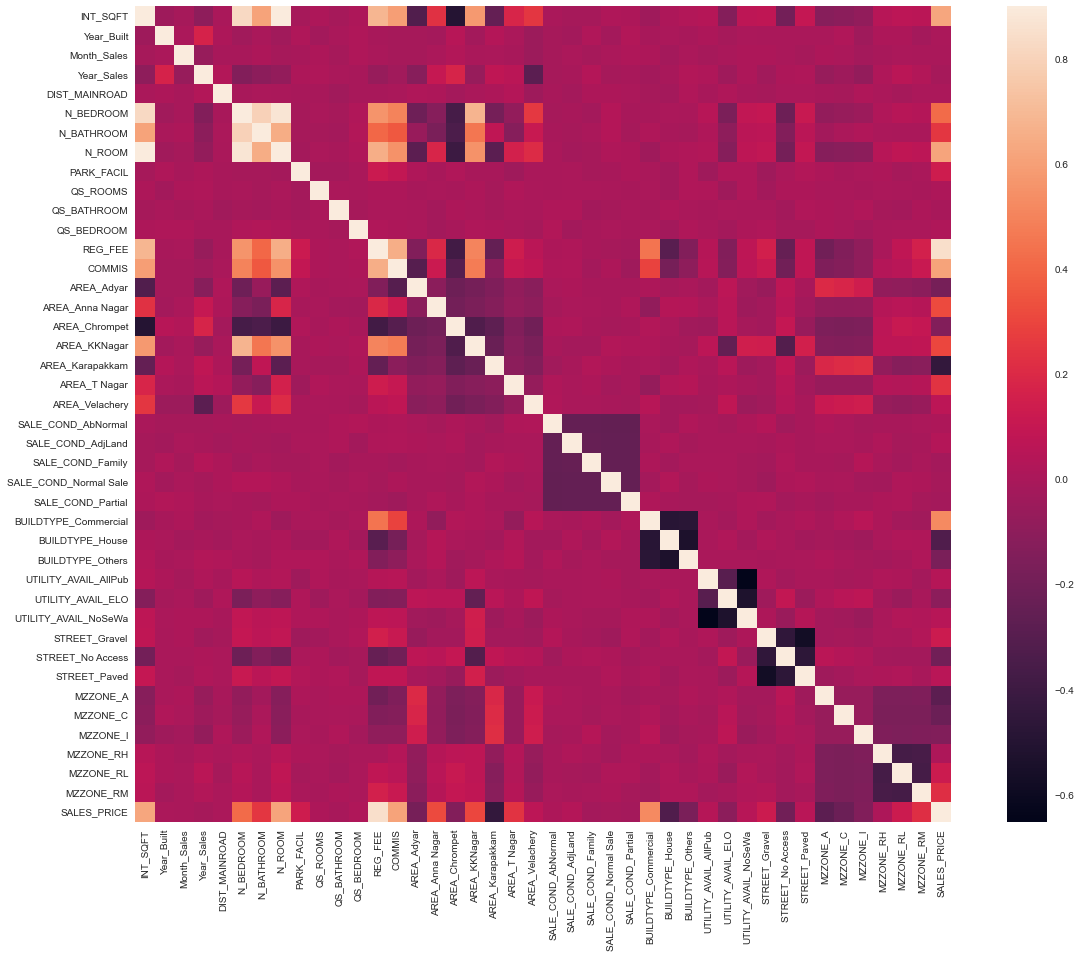

In [187]:
corrmat = df_upd.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [188]:
fig = px.histogram(df_upd, x="DATE_SALE", y="SALES_PRICE", histfunc="avg", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=df_upd["DATE_SALE"], y=df_upd["SALES_PRICE"], name="daily"))

fig.update_layout(
    autosize=False,
    width=4000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)
fig.show()

In [189]:
data_plot_k = df_upd[df_upd['AREA_Karapakkam']==1]
fig = px.scatter(data_plot_k, x="DATE_SALE", y="SALES_PRICE", title='Time Series with Rangeslider - Sales Karapakkam')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [190]:
df_upd = df_upd.drop(['REG_FEE', 'COMMIS','Year_Built'], axis = 1)
cor = pd.DataFrame(df_upd.corrwith(df_upd['SALES_PRICE']))
cor['Features'] = cor.index
cor.sort_values(0,ascending=False, inplace=False)

0               Features
SALES_PRICE            1.000000            SALES_PRICE
INT_SQFT               0.626107               INT_SQFT
N_ROOM                 0.615521                 N_ROOM
BUILDTYPE_Commercial   0.517993   BUILDTYPE_Commercial
N_BEDROOM              0.417816              N_BEDROOM
AREA_Anna Nagar        0.316538        AREA_Anna Nagar
AREA_KKNagar           0.300425           AREA_KKNagar
N_BATHROOM             0.249849             N_BATHROOM
AREA_T Nagar           0.237528           AREA_T Nagar
MZZONE_RM              0.218288              MZZONE_RM
PARK_FACIL             0.135001             PARK_FACIL
STREET_Gravel          0.129370          STREET_Gravel
MZZONE_RL              0.126149              MZZONE_RL
AREA_Velachery         0.063687         AREA_Velachery
STREET_Paved           0.053997           STREET_Paved
UTILITY_AVAIL_NoSeWa   0.046760   UTILITY_AVAIL_NoSeWa
UTILITY_AVAIL_AllPub   0.041899   UTILITY_AVAIL_AllPub
SALE_COND_AdjLand      0.033834      SALE_COND_AdjLand
QS_BEDROOM             0.014796             QS_BEDROOM
MZZONE_RH              0.013859              MZZONE_RH
QS_ROOMS               0.012475               QS_ROOMS
SALE_COND_AbNormal     0.011429     SALE_COND_AbNormal
DIST_MAINROAD          0.002847          DIST_MAINROAD
Month_Sales           -0.001428            Month_Sales
QS_BATHROOM           -0.008680            QS_BATHROOM
SALE_COND_Normal Sale -0.011219  SALE_COND_Normal Sale
Year_Sales            -0.012108             Year_Sales
SALE_COND_Partial     -0.015836      SALE_COND_Partial
SALE_COND_Family      -0.018131       SALE_COND_Family
UTILITY_AVAIL_ELO     -0.105811      UTILITY_AVAIL_ELO
AREA_Chrompet         -0.141657          AREA_Chrompet
MZZONE_I              -0.144343               MZZONE_I
BUILDTYPE_Others      -0.170091       BUILDTYPE_Others
AREA_Adyar            -0.184217             AREA_Adyar
STREET_No Access      -0.198893       STREET_No Access
MZZONE_C              -0.223079               MZZONE_C
MZZONE_A              -0.282012               MZZONE_A
BUILDTYPE_House       -0.330912        BUILDTYPE_House
AREA_Karapakkam       -0.445776        AREA_Karapakkam

In [191]:
sel_col = cor[(cor[0]>0.01) & (cor[0]<0.9)]
sel_col.sort_values(0,ascending=False, inplace=False)

0              Features
INT_SQFT              0.626107              INT_SQFT
N_ROOM                0.615521                N_ROOM
BUILDTYPE_Commercial  0.517993  BUILDTYPE_Commercial
N_BEDROOM             0.417816             N_BEDROOM
AREA_Anna Nagar       0.316538       AREA_Anna Nagar
AREA_KKNagar          0.300425          AREA_KKNagar
N_BATHROOM            0.249849            N_BATHROOM
AREA_T Nagar          0.237528          AREA_T Nagar
MZZONE_RM             0.218288             MZZONE_RM
PARK_FACIL            0.135001            PARK_FACIL
STREET_Gravel         0.129370         STREET_Gravel
MZZONE_RL             0.126149             MZZONE_RL
AREA_Velachery        0.063687        AREA_Velachery
STREET_Paved          0.053997          STREET_Paved
UTILITY_AVAIL_NoSeWa  0.046760  UTILITY_AVAIL_NoSeWa
UTILITY_AVAIL_AllPub  0.041899  UTILITY_AVAIL_AllPub
SALE_COND_AdjLand     0.033834     SALE_COND_AdjLand
QS_BEDROOM            0.014796            QS_BEDROOM
MZZONE_RH             0.013859             MZZONE_RH
QS_ROOMS              0.012475              QS_ROOMS
SALE_COND_AbNormal    0.011429    SALE_COND_AbNormal

In [192]:
sel_col = list(sel_col['Features'])
len(sel_col)

21

In [193]:
sel_col

['INT_SQFT',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'PARK_FACIL',
 'QS_ROOMS',
 'QS_BEDROOM',
 'AREA_Anna Nagar',
 'AREA_KKNagar',
 'AREA_T Nagar',
 'AREA_Velachery',
 'SALE_COND_AbNormal',
 'SALE_COND_AdjLand',
 'BUILDTYPE_Commercial',
 'UTILITY_AVAIL_AllPub',
 'UTILITY_AVAIL_NoSeWa',
 'STREET_Gravel',
 'STREET_Paved',
 'MZZONE_RH',
 'MZZONE_RL',
 'MZZONE_RM']

In [194]:
from sklearn.model_selection import train_test_split
x= df_upd[sel_col]
x
y = df_upd['SALES_PRICE']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [195]:
x

INT_SQFT  N_BEDROOM  N_BATHROOM  N_ROOM  PARK_FACIL  QS_ROOMS  \
2          909        1.0         1.0       3           1       4.1   
3         1855        3.0         2.0       5           0       4.7   
5         1220        2.0         1.0       4           0       4.5   
7         1847        3.0         2.0       5           0       2.4   
9         1635        2.0         1.0       4           0       3.1   
...        ...        ...         ...     ...         ...       ...   
7098      1611        1.0         1.0       4           1       3.2   
7100      1733        1.0         1.0       4           1       3.4   
7102       701        1.0         1.0       2           0       4.2   
7103      1462        2.0         2.0       4           0       2.7   
7105      1897        3.0         2.0       5           1       3.6   

      QS_BEDROOM  AREA_Anna Nagar  AREA_KKNagar  AREA_T Nagar  ...  \
2            2.2                0             0             0  ...   
3            3.6                0             0             0  ...   
5            3.1                0             0             0  ...   
7            2.1                0             0             0  ...   
9            3.3                0             0             0  ...   
...          ...              ...           ...           ...  ...   
7098         2.9                1             0             0  ...   
7100         2.1                0             0             1  ...   
7102         2.0                0             0             0  ...   
7103         3.6                0             0             0  ...   
7105         3.3                0             0             0  ...   

      SALE_COND_AbNormal  SALE_COND_AdjLand  BUILDTYPE_Commercial  \
2                      1                  0                     1   
3                      0                  0                     0   
5                      0                  0                     1   
7                      0                  0                     1   
9                      1                  0                     0   
...                  ...                ...                   ...   
7098                   0                  0                     0   
7100                   1                  0                     1   
7102                   1                  0                     0   
7103                   0                  0                     0   
7105                   0                  0                     0   

      UTILITY_AVAIL_AllPub  UTILITY_AVAIL_NoSeWa  STREET_Gravel  STREET_Paved  \
2                        0                     0              1             0   
3                        0                     1              0             1   
5                        0                     1              0             0   
7                        1                     0              1             0   
9                        0                     0              0             0   
...                    ...                   ...            ...           ...   
7098                     0                     1              0             1   
7100                     0                     1              0             0   
7102                     0                     1              1             0   
7103                     0                     1              1             0   
7105                     0                     1              0             0   

      MZZONE_RH  MZZONE_RL  MZZONE_RM  
2             0          1          0  
3             0          0          0  
5             1          0          0  
7             0          0          1  
9             0          0          0  
...         ...        ...        ...  
7098          0          0          1  
7100          0          1          0  
7102          1          0          0  
7103          0          0          1  
7105          1          0          0  

[3761 rows x 21 columns]

## Model 1 : Ridge CV 

In [196]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-12, -0.5, 400)
ridge = RidgeCV(alphas=alphas)

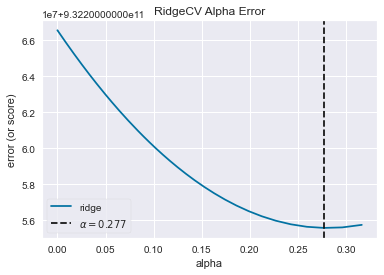

In [197]:
from yellowbrick.regressor import AlphaSelection
visualizer = AlphaSelection(ridge)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
g = visualizer.poof()

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RidgeCV was fitted with feature names



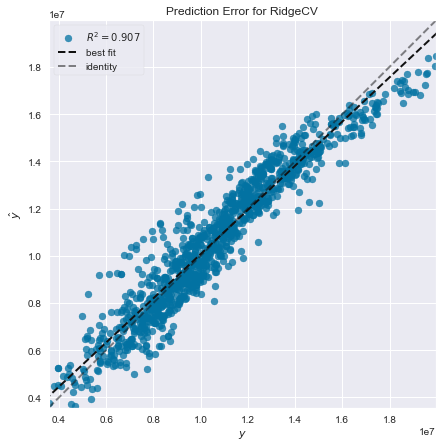

In [198]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(ridge,size=(500, 1000))
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()

In [199]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
ridge_new = make_pipeline(StandardScaler(), RidgeCV(alphas=0.2926))
ridge_new.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=array(0.2926)))])

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



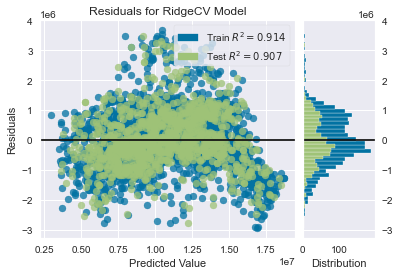

In [200]:
visualizer_rp = ResidualsPlot(ridge_new)
visualizer_rp.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_rp.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer_rp.poof() 

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



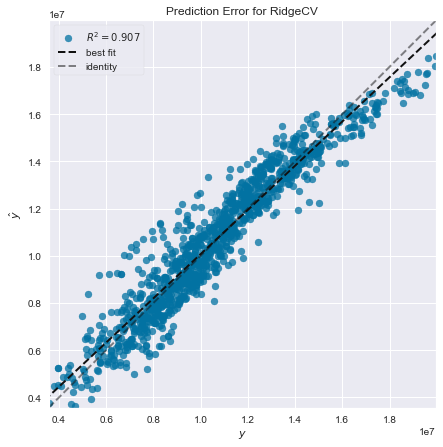

In [201]:
visualizer_rg = PredictionError(ridge_new,size=(500, 1000))
visualizer_rg.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_rg.score(X_test, y_test) # Evaluate the model on the test data
rg = visualizer_rg.poof()

In [202]:
print(f'model score on training data: {ridge_new.score(X_train, y_train)}')
print(f'model score on testing data: {ridge_new.score(X_test, y_test)}')

model score on training data: 0.9144143272293294
model score on testing data: 0.9072464087938658


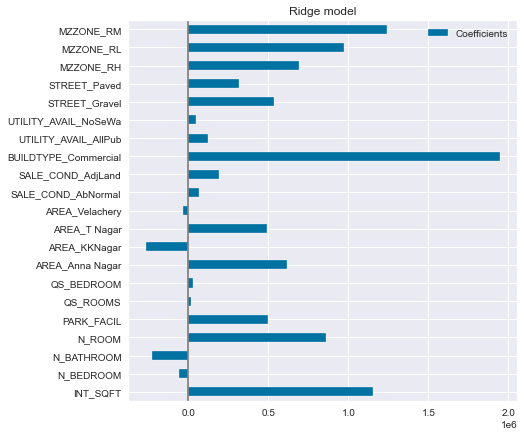

In [203]:
coefs = pd.DataFrame(
   ridge_new[1].coef_,
   columns=['Coefficients'], index=X_train.columns
)
coefs['Features'] = coefs.index
coefs.sort_values(by='Coefficients',ascending=False, inplace=False)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

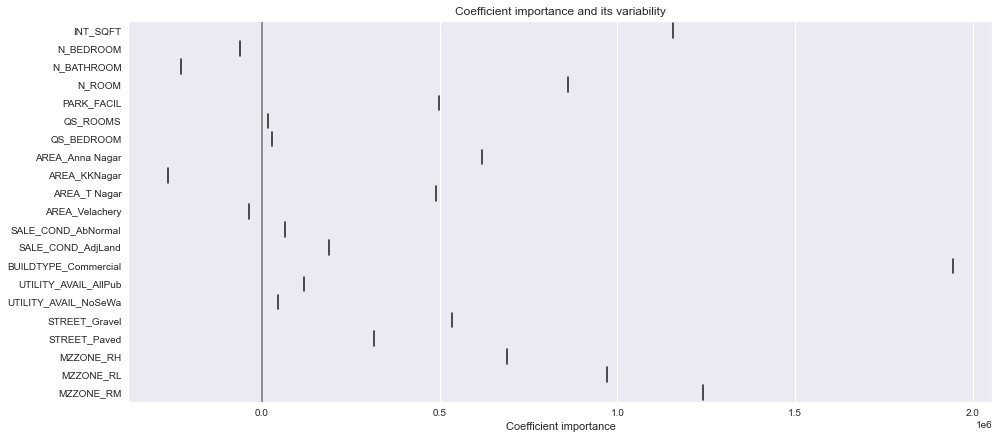

In [204]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
   ridge_new, x, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
   return_estimator=True, n_jobs=2
)
coefs = pd.DataFrame(
   [ridge_new[1].coef_
    for model in cv_model['estimator']],
   columns=x.columns
)
plt.figure(figsize=(20, 7))
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

Since the coefficients have been scaled, we can safely compare them.

The BUILDTYPE_Commercial feature, with MZZONE_RM and INT_SQFT are the three variables that most influence the model.

The plot above tells us about dependencies between a specific feature and the target when all other features remain constant, i.e., conditional dependencies. An increase of the QS_ROOMS will induce an increase of the price when all other features remain constant. On the contrary, an increase of N_BEDROOM or N_BATHROOM will induce an decrease of the price when all other features remain constant.



Most Imortant features based on Ridge CV Model are as follows
1. BUILDTYPE_Commercial
2. MZZONE_RM
3. INT_SQFT
4. MZZONE_RL
5. N_ROOM

In [206]:
Y_pred =[[3000,4,3,30,1,4,3,0,1,0,0,1,0,1,1,0,0,1,0,0,1]]
ridge_new.predict(Y_pred)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([39124448.86641952])

# Model 2: LASSO

In [207]:
import warnings
from sklearn.linear_model import LassoCV
lass = make_pipeline(StandardScaler(),LassoCV(cv=10))
lass.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(cv=10))])

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



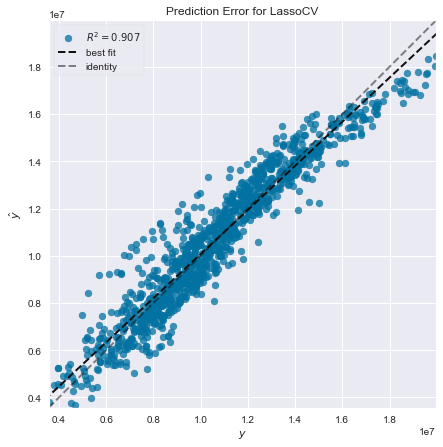

In [208]:
visualizer = PredictionError(lass,size=(500, 1000))
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
la = visualizer.poof()

In [209]:
print(f'model score on training data: {lass.score(X_train, y_train)}')
print(f'model score on testing data: {lass.score(X_test, y_test)}')

model score on training data: 0.9143905697029517
model score on testing data: 0.9072141449479992


C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



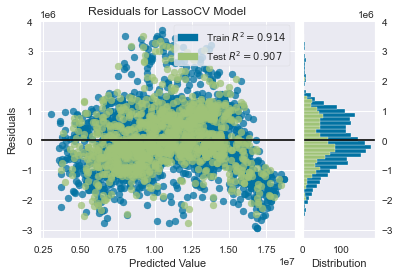

In [210]:
visualizer_las = ResidualsPlot(lass)
visualizer_las.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_las.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer_las.poof() 

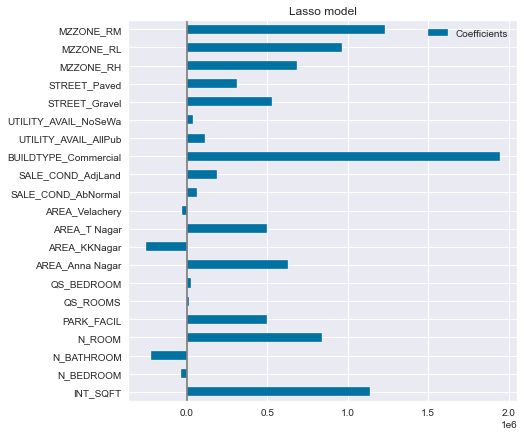

In [211]:
coefs = pd.DataFrame(
   lass[1].coef_,
   columns=['Coefficients'], index=X_train.columns
)
coefs.sort_values(by='Coefficients',ascending=False, inplace=False)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Most Imortant features based on LassoCV Model are as follows

1. BUILDTYPE_Commercial
2. MZZONE_RM
3. INT_SQFT
4. MZZONE_RL
5. N_ROOM

# Model 3: Linear Regression

In [213]:
from sklearn import linear_model
reg = make_pipeline(StandardScaler(),linear_model.LinearRegression())
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



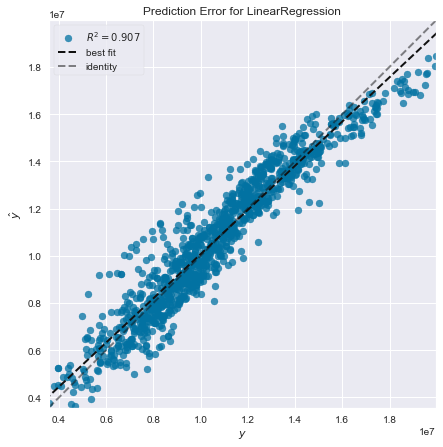

In [214]:
visualizer = PredictionError(reg,size=(500, 1000))
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
lr = visualizer.poof()

In [215]:
print(f'model score on training data: {reg.score(X_train, y_train)}')
print(f'model score on testing data: {reg.score(X_test, y_test)}')

model score on training data: 0.9144143572562858
model score on testing data: 0.9072422472846816


C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



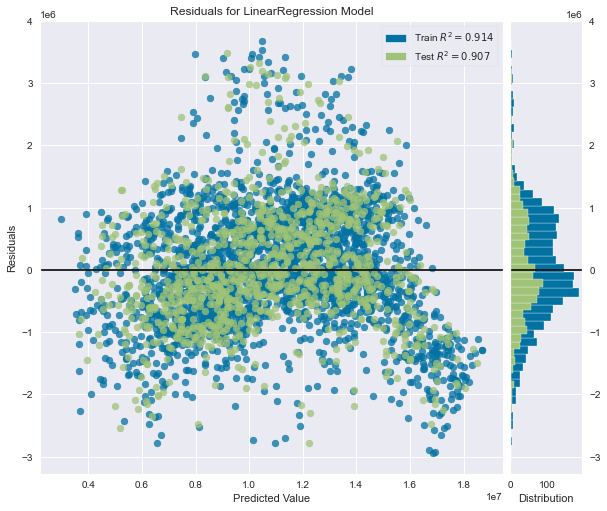

In [228]:
visualizer_reg = ResidualsPlot(reg,size=(700, 600))
visualizer_reg.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_reg.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer_reg.poof() 

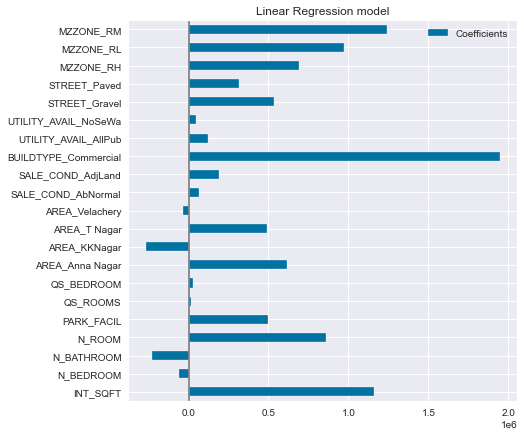

In [229]:
coefs = pd.DataFrame(
   reg[1].coef_,
   columns=['Coefficients'], index=X_train.columns
)
coefs.sort_values(by='Coefficients',ascending=False, inplace=False)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Most Imortant features based on Linear Regression Model are as follows

1. BUILDTYPE_Commercial
2. MZZONE_RM
3. INT_SQFT
4. MZZONE_RL
5. N_ROOM

# Model4: RandomForest 

In [230]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



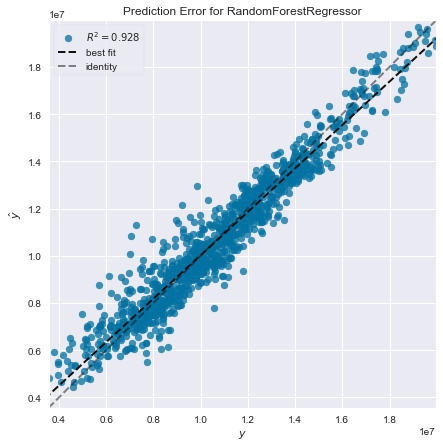

In [231]:
visualizer = PredictionError(rf,size=(500, 1000))
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
raf = visualizer.poof()

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



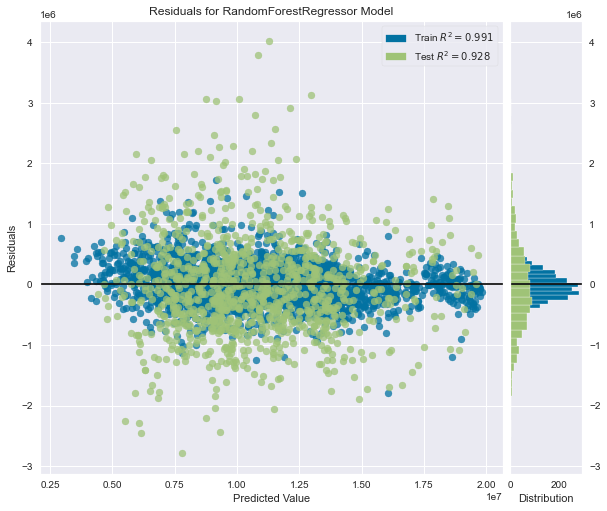

In [232]:
visualizer_rf = ResidualsPlot(rf,size=(700, 600))
visualizer_rf.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_rf.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer_rf.poof() 

In [233]:
print(f'model score on training data: {rf.score(X_train, y_train)}')
print(f'model score on testing data: {rf.score(X_test, y_test)}')

model score on training data: 0.9905327063109871
model score on testing data: 0.9282852245454926


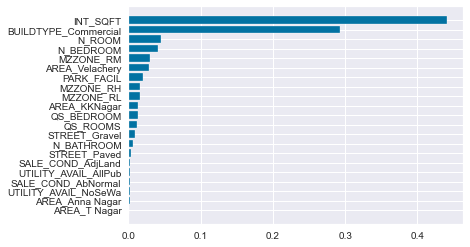

In [234]:
imp_feat = rf.feature_importances_
indices = np.argsort(imp_feat)

fig, ax = plt.subplots()
ax.barh(range(len(imp_feat)), imp_feat[indices])
ax.set_yticks(range(len(imp_feat)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

The INT_SQFT feature and BUILDTYPE_Commercial are the two variables that most influence the model.

Most Imortant features based on RandomForest Regressor Model are as follows

1. INT_SQFT
2. BUILDTYPE_Commercial
3. N_ROOM
4. N_BEDROOM
5. MZZONE_RM

# Model 5 : Decision Tree

In [235]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



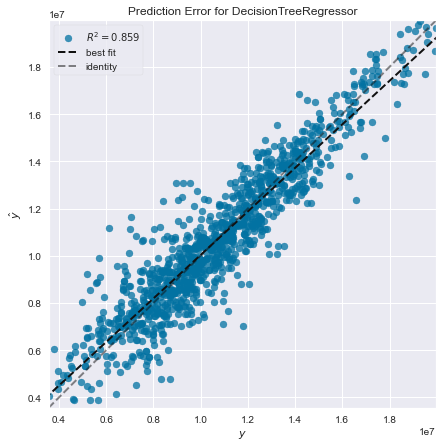

In [236]:
visualizer = PredictionError(dt,size=(500, 1000))
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
dtr = visualizer.poof()

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



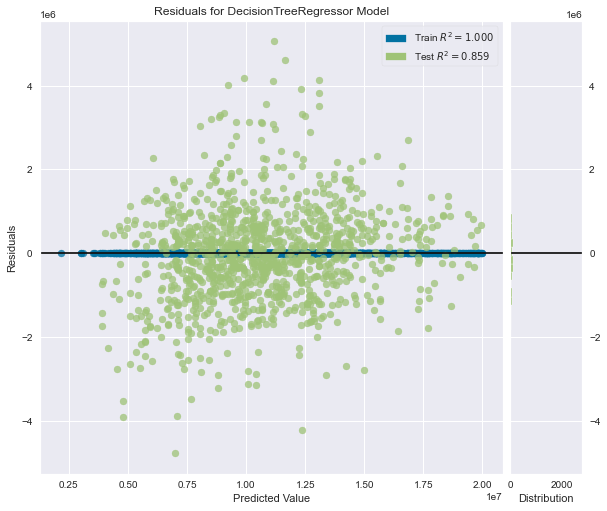

In [238]:
visualizer_dt = ResidualsPlot(dt,size=(700, 600))
visualizer_dt.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_dt.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer_dt.poof() 

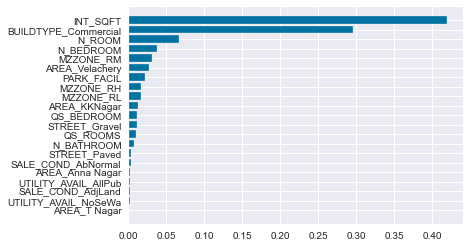

In [239]:
imp_feat = dt.feature_importances_
indices = np.argsort(imp_feat)

fig, ax = plt.subplots()
ax.barh(range(len(imp_feat)), imp_feat[indices])
ax.set_yticks(range(len(imp_feat)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

Most Imortant features based on Decision Tree Regressor Model are as follows

1. INT_SQFT
2. BUILDTYPE_Commercial
3. N_ROOM
4. N_BEDROOM
5. MZZONE_RM

In [240]:
from sklearn import tree
dt_md = DecisionTreeRegressor(max_depth = 3)
impt_feat = ['INT_SQFT','BUILDTYPE_Commercial','N_ROOM','N_BEDROOM','MZZONE_RM']
dt_md.fit(X_train[impt_feat], y_train)
text_representation = tree.export_text(dt_md)
print(text_representation)

|--- feature_0 <= 1506.00
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- value: [6528345.83]
|   |   |--- feature_2 >  2.50
|   |   |   |--- value: [8727097.96]
|   |--- feature_1 >  0.50
|   |   |--- feature_0 <= 978.50
|   |   |   |--- value: [10116959.56]
|   |   |--- feature_0 >  978.50
|   |   |   |--- value: [12691681.42]
|--- feature_0 >  1506.00
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 1735.00
|   |   |   |--- value: [10691596.41]
|   |   |--- feature_0 >  1735.00
|   |   |   |--- value: [12301028.82]
|   |--- feature_1 >  0.50
|   |   |--- feature_3 <= 1.50
|   |   |   |--- value: [18644785.80]
|   |   |--- feature_3 >  1.50
|   |   |   |--- value: [15479259.44]



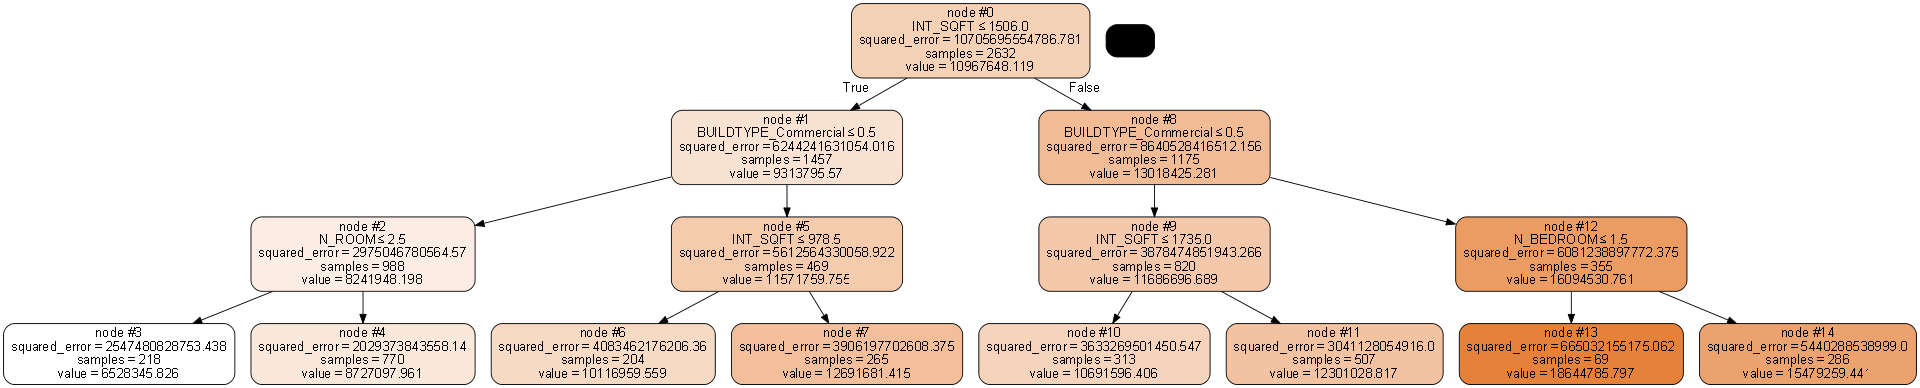

In [241]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
dot_data = StringIO()
export_graphviz(dt_md, out_file=dot_data,  
                filled=True, rounded=True,
                node_ids=True,
                feature_names=X_train[impt_feat].columns,
                special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"20,20!"')
graph.write_png('dt.png')
Image(graph.create_png())


Best Interpretation 

1. Initial Square feet is less than equal to 1506, less than equal to 50%  chance to be a Buildtype Commercial and no. of Bedrooms should be greater than 1, then the expected price of House is Rs.1,86,44,785.

# Model 6: Gradient Boost Regressor

In [242]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(X_train, y_train)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



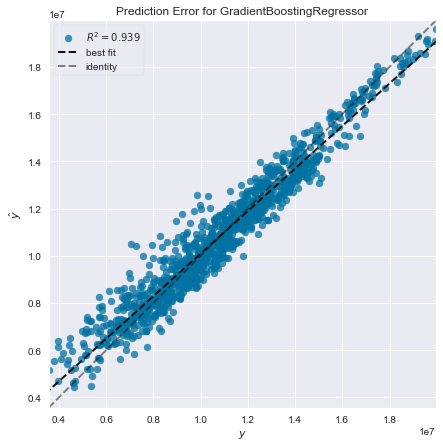

In [243]:
visualizer = PredictionError(gbr,size=(500, 1000))
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
gb = visualizer.poof()

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



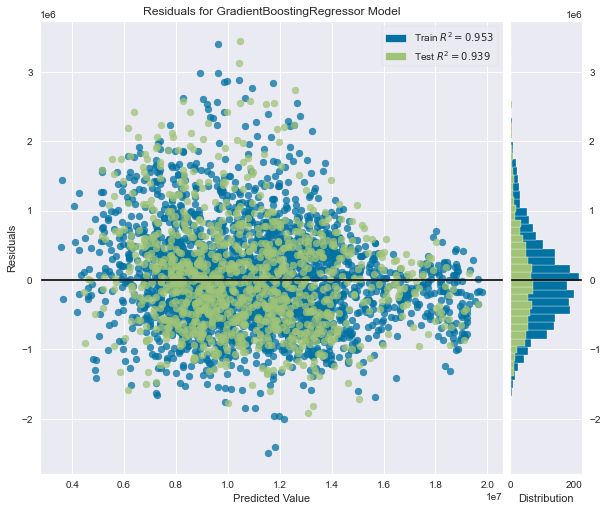

In [245]:
visualizer_gbr = ResidualsPlot(gbr,size=(700, 600))
visualizer_gbr.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_gbr.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer_gbr.poof()

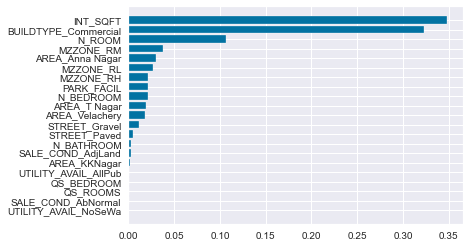

In [246]:
imp_feat = gbr.feature_importances_
indices = np.argsort(imp_feat)

fig, ax = plt.subplots()
ax.barh(range(len(imp_feat)), imp_feat[indices])
ax.set_yticks(range(len(imp_feat)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

Here the top 5 Features are:

            1. INT_SQFT
            2. BUILDTYPE_Commercial
            3. N_ROOM
            4. MZZONE_RM
            5. Area_Anna Nagar

# Model 7: Support Vector Regressor

In [247]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
kernels=['linear', 'poly', 'rbf', 'sigmoid']
kernel=[]
r2=[]
for i in kernels:
    svr = SVR(kernel = i).fit(X_train, y_train)
    y_pred = svr.predict(X_train)
    r2_sc =  r2_score(y_train,y_pred)
    kernel.append(i)
    r2.append(r2_sc)
print(r2)
print(kernel)
max_index = r2.index(max(r2))
k = kernel[max_index]
print('\n')
print('Best Kernel is:', k)

[0.37326832922530184, -0.00953078083099168, -0.010130251424085968, -0.01022229595169799]
['linear', 'poly', 'rbf', 'sigmoid']


Best Kernel is: linear


In [248]:
svr_upd = SVR(kernel = k).fit(X_train, y_train)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



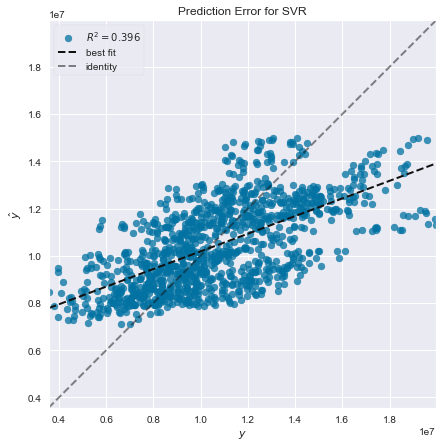

In [249]:
visualizer = PredictionError(svr_upd,size=(500, 1000))
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
sv = visualizer.poof()

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



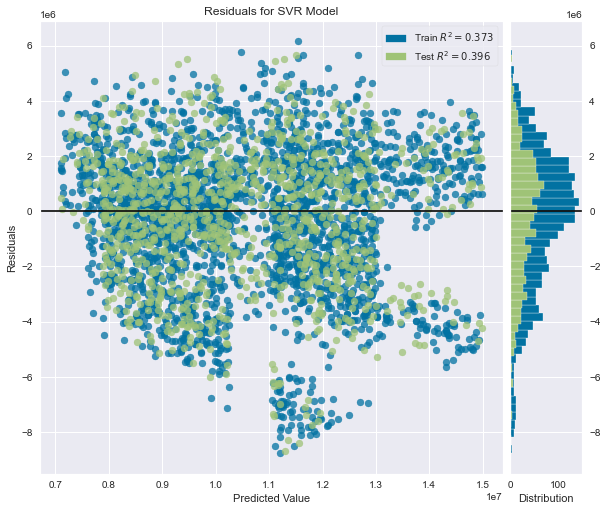

In [250]:
visualizer_sv = ResidualsPlot(svr_upd,size=(700, 600))
visualizer_sv.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_sv.score(X_test, y_test) # Evaluate the model on the test data
sv1 = visualizer_sv.poof()

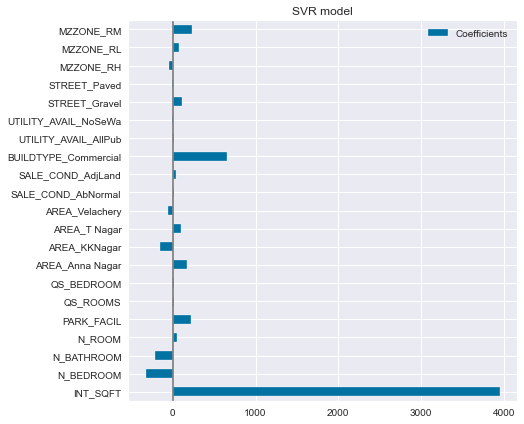

In [251]:
coefs = pd.DataFrame(
   svr_upd.coef_.reshape(-1),
   columns=['Coefficients'], index=X_train.columns
)
coefs.sort_values(by='Coefficients',ascending=False, inplace=False)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('SVR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Here the top 5 Features are:

            1. INT_SQFT
            2. BUILDTYPE_Commercial
            3. MZZONE_RM
            4. PARK_FACIL
            5. Area_Anna Nagar

# Model 8: ElasticNet Regression

In [252]:
from sklearn.linear_model import ElasticNet 
enr = ElasticNet(l1_ratio=1).fit(X_train, y_train)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but ElasticNet was fitted with feature names



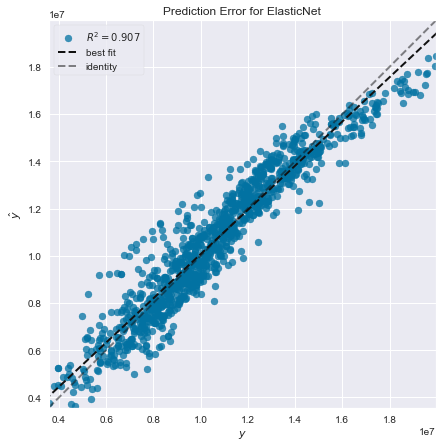

In [253]:
visualizer = PredictionError(enr,size=(500, 1000))
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
en = visualizer.poof()

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but ElasticNet was fitted with feature names



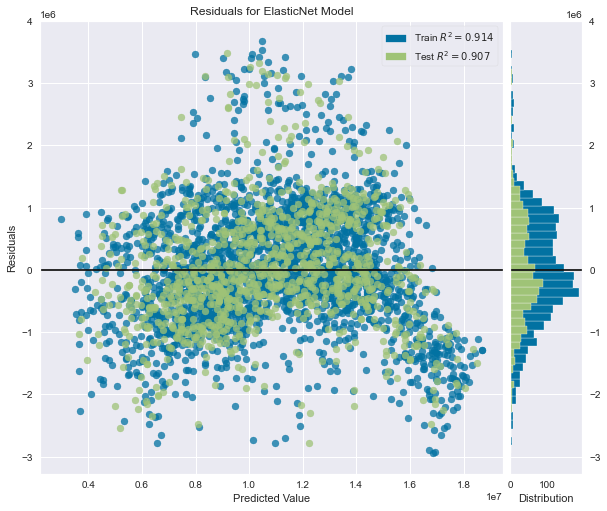

In [254]:
visualizer_en = ResidualsPlot(enr,size=(700, 600))
visualizer_en.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer_en.score(X_test, y_test) # Evaluate the model on the test data
ent = visualizer_en.poof()

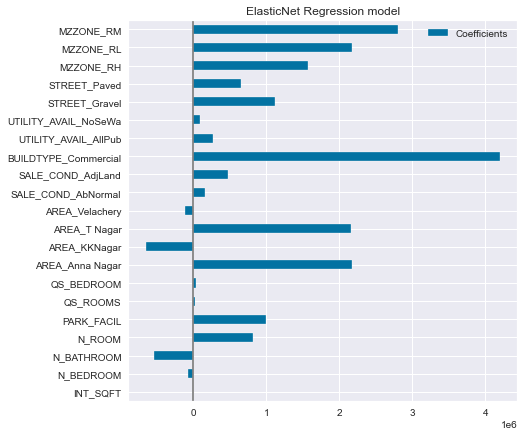

In [255]:
coefs = pd.DataFrame(
   enr.coef_,
   columns=['Coefficients'], index=X_train.columns
)
coefs.sort_values(by='Coefficients',ascending=False, inplace=False)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('ElasticNet Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Here the top 5 Features are:

            1. BUILDTYPE_Commercial
            2. MZZONE_RM
            3. MZZONE_RL
            4. Area_T Nagar
            5. Area_Anna Nagar

In [256]:
datam=[['Ridge Regression',visualizer_rp.train_score_,visualizer_rp.test_score_],
       ['Lasso Regression',visualizer_las.train_score_,visualizer_las.test_score_],
       ['Linear Regression',visualizer_reg.train_score_,visualizer_reg.test_score_],
       ['RandomForest Regressor',visualizer_rf.train_score_,visualizer_rf.test_score_],
       ['Decision Tree Regressor',visualizer_dt.train_score_,visualizer_dt.test_score_],
       ['Gradient Boost Regressor',visualizer_gbr.train_score_,visualizer_gbr.test_score_],
       ['Support Vector Regressor',visualizer_sv.train_score_,visualizer_sv.test_score_],
       ['ElasticNet Regression',visualizer_en.train_score_,visualizer_en.test_score_]]
dframe=pd.DataFrame(datam,columns=['Models','train_score(R2)','test_score(R1)'])
dframe[['train_score(R2)','test_score(R1)']] = dframe[['train_score(R2)','test_score(R1)']].round(decimals = 3)
dframe

Models  train_score(R2)  test_score(R1)
0          Ridge Regression            0.914           0.907
1          Lasso Regression            0.914           0.907
2         Linear Regression            0.914           0.907
3    RandomForest Regressor            0.991           0.928
4   Decision Tree Regressor            1.000           0.859
5  Gradient Boost Regressor            0.953           0.939
6  Support Vector Regressor            0.373           0.396
7     ElasticNet Regression            0.914           0.907

From the above the table the top models are Gradient Boost Regressor and RandForest Regressor based on the test acuuracy (R2).

And the top features that would positively affect the sales price are as follows:
1. INT_SQFT             -  Interior Squarefeet
2. BUILDTYPE_Commercial -  Buildtype: Commercial
3. N_ROOM               -  No.of Rooms
4. MZZONE_RM            - 
                
                


# Price Prediction using the Top Features

In [257]:
top_f = ['INT_SQFT','BUILDTYPE_Commercial','N_ROOM','MZZONE_RM']
gbr_new = GradientBoostingRegressor().fit(X_train[top_f], y_train) #Top Model with High Test Accuracy

In [258]:
pred = gbr_new.predict(X_train[top_f])
pred

array([13529226.84228553,  8105282.84625677, 13332653.05807477, ...,
       13370983.22563126,  7861640.9350777 ,  9127922.21479506])

In [259]:
y_pred1 =[[3000,1,8,1]]
gbr_new.predict(y_pred1)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



array([19919054.04072937])

1. INT_SQFT             -  3000
2. BUILDTYPE_Commercial -  Yes[1]
3. N_ROOM               -   8
4. MZZONE_RM            -  Yes[1]

SalesPrice: Rs.1,99,19,054